# Import Pandas, Matplotlib and Seaborn

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Loading the Data

In [130]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Explore the Data

There seem to be six countries in the data set.

In [131]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Next we explore how many years there in the data set.

In [132]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### Cleaning Column name
The third columns is a bit long and is therefor renamed in "LEABY".

In [133]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Creating exploratory plots

First we want to explore the distribution of GDPs. We use a histogram for that. The distribution of GDPS is very right-skewed with the majority of values on the left-hand side.

<Figure size 576x432 with 0 Axes>

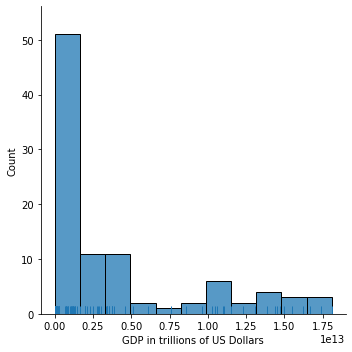

In [134]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug = True)
plt.xlabel("GDP in trillions of US Dollars");


Next we want to explore the distribution of life expectancies. We use a histogram as well. The distribution of LEABY is very left-skewed with most of the values on the right-hand side. 

<Figure size 576x432 with 0 Axes>

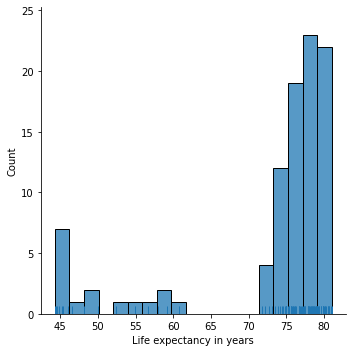

In [135]:
plt.figure(figsize=(8,6))
sns.displot(df.LEABY, rug = True)
plt.xlabel("Life expectancy in years");

The plots created so far were not broken down by countries. So the next thing we want to do is finding out the average life expectancy and GDP per country.

In [136]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [137]:
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


With this new data we can create barcharts to make it easier to compare the average LEABY and GDP per country.
The average LEABY for Chile, China, Germany, Mexico and the US is somewhere between 75 and 80 years, whereas in Zimbabwe it's only 50 years.

Text(0.5, 0, 'Life expectancy at birth (years)')

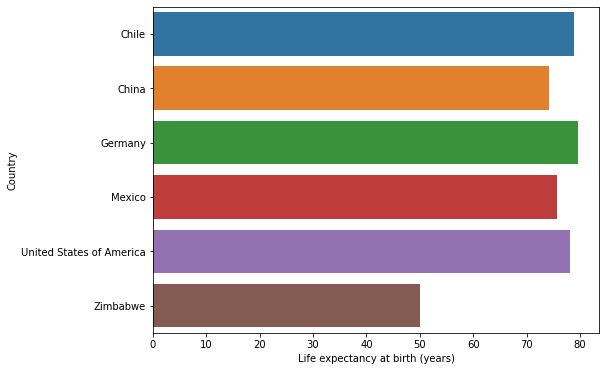

In [138]:
plt.figure(figsize=(8,6))
sns.barplot(x = "LEABY", y = "Country", data = dfMeans)
plt.xlabel("Life expectancy at birth (years)")

The US has by far the highest GDP whereas Chile is barely visible and Zimbabwe isn't visible at all. China, Germany and Mexico are quite close together. Together with what we learned from the first barchart we can assume that there seems to be relationship between life expectancy and GDP but we can't tell how this relationship looks like. Although the US has by far the highest GDP the average life expectancy is quite similar to other countries. Nevertheless Zimbabwe has by far the smallest GDP and also the smallest life expectancy.

Text(0.5, 0, 'GDB in Trillions of US Dollars)')

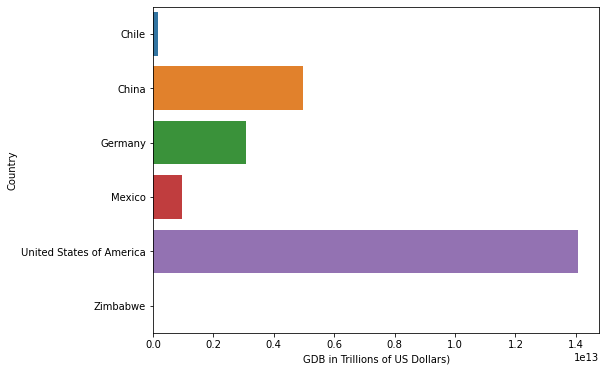

In [139]:
plt.figure(figsize=(8,6))
sns.barplot(x = "GDP", y = "Country", data = dfMeans)
plt.xlabel("GDB in Trillions of US Dollars)")

### Line Charts

Next we want to explore GDP and life exptectancy of the countries over time. We can best visualize that with line charts. From the chart we can see that the GDP of the US and China increased constantly in the period from 2000-2015. Whereas the GDP of the other countries stayed nearly the same.

#### GDP

Text(0, 0.5, 'GDP in Trillions of US Dollars')

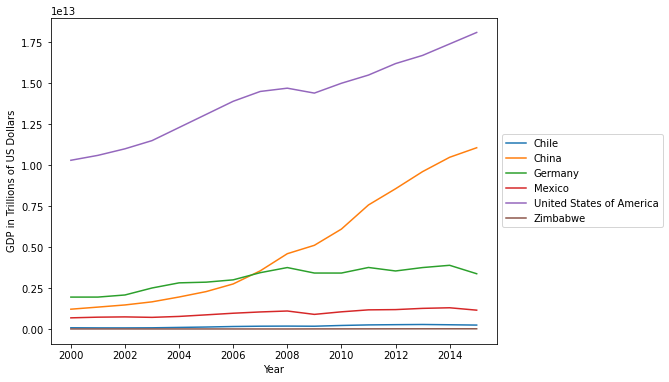

In [140]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country, data=df)
plt.legend(loc ="center left", bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of US Dollars")

By plotting an individual chart for every country we can see that all countries had GDP growth in the period from 2000-2015.

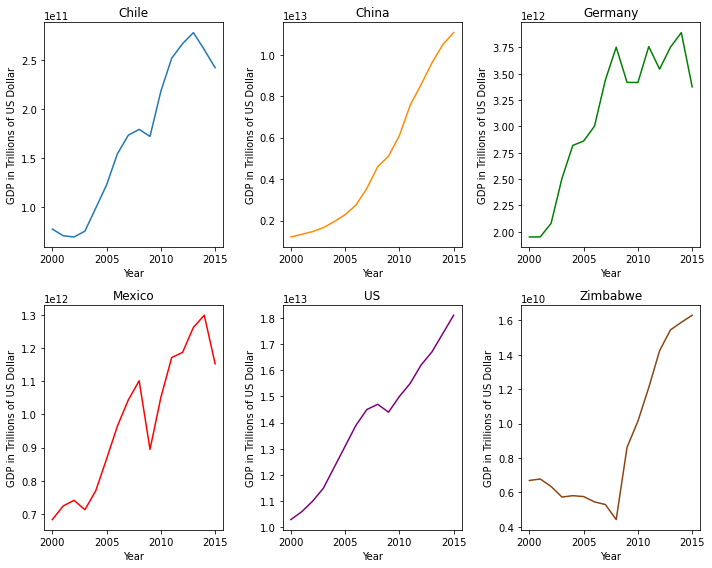

In [149]:
df_Chile = df.loc[df["Country"] =="Chile"]
df_China = df.loc[df["Country"] =="China"]
df_Germany = df.loc[df["Country"] =="Germany"]
df_Mexico = df.loc[df["Country"] =="Mexico"]
df_US = df.loc[df["Country"] =="United States of America"]
df_Zimbabwe = df.loc[df["Country"] =="Zimbabwe"]

plt.figure(figsize=(10,8))
ax1 = plt.subplot(2,3,1)
sns.lineplot(x=df_Chile.Year, y=df_Chile.GDP, data=df_Chile)
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("Chile")
ax2 = plt.subplot(2,3,2)
sns.lineplot(x=df_China.Year, y=df_China.GDP, data=df_China, color="darkorange")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("China")
ax3 = plt.subplot(2,3,3)
sns.lineplot(x=df_Germany.Year, y=df_Germany.GDP, data=df_Germany, color="green")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("Germany")
ax4 = plt.subplot(2,3,4)
sns.lineplot(x=df_Mexico.Year, y=df_Mexico.GDP, data=df_Mexico, color="r")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("Mexico")
ax5 = plt.subplot(2,3,5)
sns.lineplot(x=df_US.Year, y=df_US.GDP, data=df_US, color="purple")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("US")
ax6 = plt.subplot(2,3,6)
sns.lineplot(x=df_Zimbabwe.Year, y=df_Zimbabwe.GDP, data=df_Zimbabwe, color="saddlebrown")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("Zimbabwe")
plt.tight_layout()




#### Life expectancy

For life expectancy over time we can see that all countries experience an increase. For the 5 countries with a already high life expectancy the increase is small. For Zimbabwe there is an increase from 45 years in 2005 to 60 years in 2015.

Text(0, 0.5, 'Life expectancy at birth (years)')

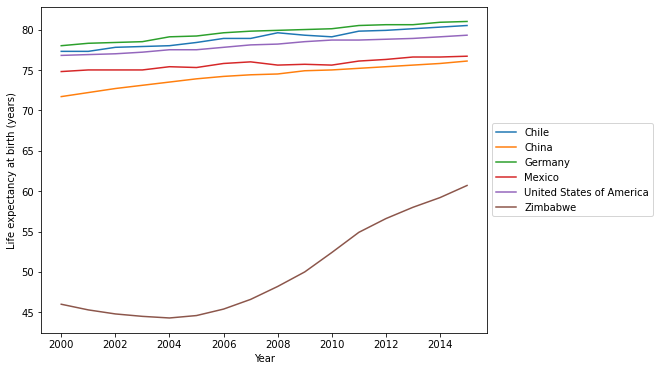

In [142]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country, data=df)
plt.legend(loc ="center left", bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")

In the seperated plots we can better see that every country had an increase of life expectancy during the
period of 2000-2015. We can also see that Chile and Mexico had a dip around the same time in 2008. This could be investigated further. We can see that the seeminlgy smooth lines are not that smooth for all the countries.

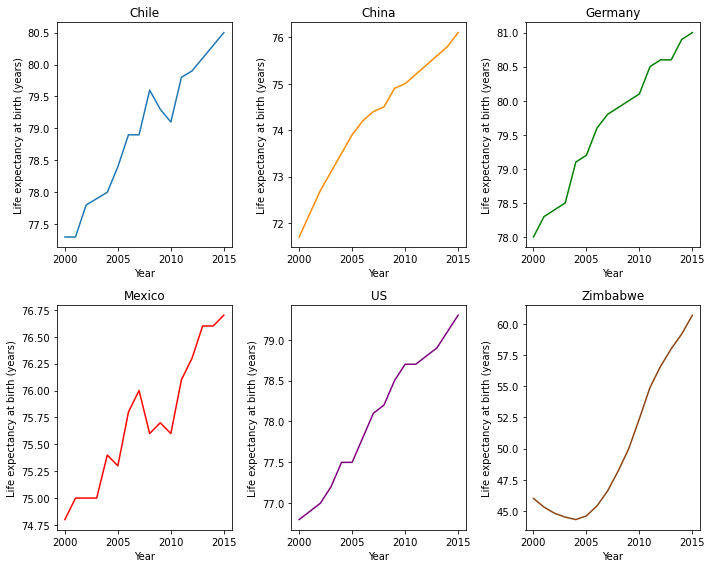

In [150]:
plt.figure(figsize=(10,8))
ax1 = plt.subplot(2,3,1)
sns.lineplot(x=df_Chile.Year, y=df_Chile.LEABY, data=df_Chile)
plt.ylabel("Life expectancy at birth (years)")
plt.title("Chile")
ax2 = plt.subplot(2,3,2)
sns.lineplot(x=df_China.Year, y=df_China.LEABY, data=df_China, color="darkorange")
plt.ylabel("Life expectancy at birth (years)")
plt.title("China")
ax3 = plt.subplot(2,3,3)
sns.lineplot(x=df_Germany.Year, y=df_Germany.LEABY, data=df_Germany, color="green")
plt.ylabel("Life expectancy at birth (years)")
plt.title("Germany")
ax4 = plt.subplot(2,3,4)
sns.lineplot(x=df_Mexico.Year, y=df_Mexico.LEABY, data=df_Mexico, color="r")
plt.ylabel("Life expectancy at birth (years)")
plt.title("Mexico")
ax5 = plt.subplot(2,3,5)
sns.lineplot(x=df_US.Year, y=df_US.LEABY, data=df_US, color="purple")
plt.ylabel("Life expectancy at birth (years)")
plt.title("US")
ax6 = plt.subplot(2,3,6)
sns.lineplot(x=df_Zimbabwe.Year, y=df_Zimbabwe.LEABY, data=df_Zimbabwe, color="saddlebrown")
plt.ylabel("Life expectancy at birth (years)")
plt.title("Zimbabwe")
plt.tight_layout()

### Scatter Plots 

We now explore the relationship between GDP and life expectancy. It looks like the life expectancy of Zimbabwe goes up with the GDP staying the same. For all the other countries the life expectancy seems to increase with an increase of the GDP.

Text(0, 0.5, 'GDP in Trillions of US Dollar')

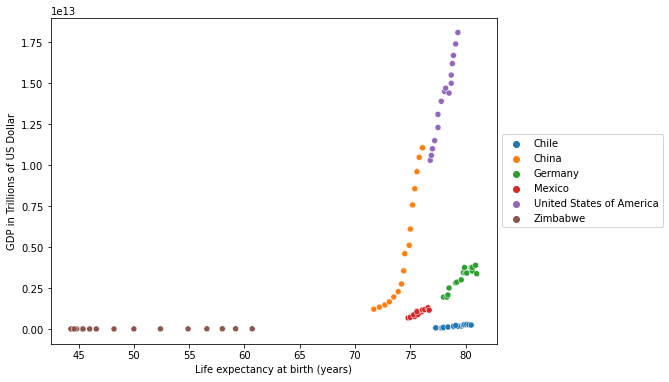

In [144]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "LEABY", y = "GDP", hue = "Country", data=df)
plt.legend(loc ="center left", bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillions of US Dollar")

In the seperated charts we can determine that there seems to be a positive correlation between life expectancy and GDP in all six countries. In general higher GDB comes with higher life expectancy. 
The US, Mexico and Zimbabwe seem to have a linear relationship between GDP and life expectancy, whereas China's curve looks exponential and Chile's Curve slightly logarithmic.

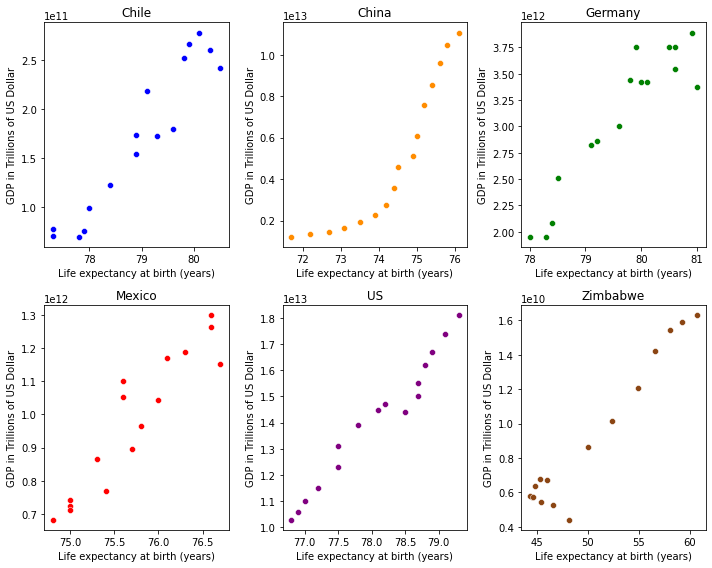

In [151]:
plt.figure(figsize=(10,8))
ax1 = plt.subplot(2,3,1)
sns.scatterplot(x=df_Chile.LEABY, y=df_Chile.GDP, data=df_Chile, color="blue")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("Chile")

ax2 = plt.subplot(2,3,2)
sns.scatterplot(x=df_China.LEABY, y=df_China.GDP, data=df_China, color="darkorange")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("China")

ax3 = plt.subplot(2,3,3)
sns.scatterplot(x=df_Germany.LEABY, y=df_Germany.GDP, data=df_Germany, color="green")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("Germany")

ax4 = plt.subplot(2,3,4)
sns.scatterplot(x=df_Mexico.LEABY, y=df_Mexico.GDP, data=df_Mexico, color="r")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("Mexico")

ax5 = plt.subplot(2,3,5)
sns.scatterplot(x=df_US.LEABY, y=df_US.GDP, data=df_US, color="purple")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("US")

ax6 = plt.subplot(2,3,6)
sns.scatterplot(x=df_Zimbabwe.LEABY, y=df_Zimbabwe.GDP, data=df_Zimbabwe, color="saddlebrown")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillions of US Dollar")
plt.title("Zimbabwe")

plt.tight_layout()

#### Pearson Correlation

To further examine the positive linear relationship we will calculate the Pearson Correlation for all six countries. We see that there is a strong positive correlation for all six countries.

In [146]:
corr_gdp_leaby_chile, p = pearsonr(df_Chile.GDP, df_Chile.LEABY)
print(corr_gdp_leaby_chile)

corr_gdp_leaby_china, p = pearsonr(df_China.GDP, df_China.LEABY)
print(corr_gdp_leaby_china)

corr_gdp_leaby_germany, p = pearsonr(df_Germany.GDP, df_Germany.LEABY)
print(corr_gdp_leaby_germany)

corr_gdp_leaby_mexico, p = pearsonr(df_Mexico.GDP, df_Mexico.LEABY)
print(corr_gdp_leaby_mexico)

corr_gdp_leaby_us, p = pearsonr(df_US.GDP, df_US.LEABY)
print(corr_gdp_leaby_us)

corr_gdp_leaby_zimbabwe, p = pearsonr(df_Zimbabwe.GDP, df_Zimbabwe.LEABY)
print(corr_gdp_leaby_zimbabwe)

0.9498766659254413
0.9085255408648356
0.932698898256127
0.932237716784708
0.9817092382430257
0.9661998955858779


# Conclusion

In this project we were able to explore the given data by creating differen plots. By calculating summary statistics and visualizing the data we could answer the questions posed in the beginning.
-  Has life expectancy increased over time in the six nations?
    -  Life expectancy increased in every country over the period from 2000-2015.
    
-  Has GDP increased over time in the six nations?
    -  As life expectancy, GDP also increased during the examined period in all six countries.
    
-  Is there a correlation between GDP and life expectancy of a country?
    -  As we can see from the Scatterplots for each country there is a positive linear correlation between life expectancy and GDP. The calculated correlation is > .90 for all six countries confirming what we learned from the plots.
    
-  What is the average life expectancy in these nations?
    -  The average life expectancy for five out of six countries was in the mid to high 70s. Only in Zimbabwe the average life expectancy was around 50 years.

-  What is the distribution of that life expectancy?
    -  The distribution was highly left-skewed meaning most of the values where on the right-hand side.